<a href="https://colab.research.google.com/github/Pratikdate/ML-Models/blob/main/face_type_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import collections
import pathlib
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import tensorflow as tf
import pandas as pd
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import utils
from tensorflow.keras.layers import TextVectorization
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
#import tensorflow_text as tf_text
import pathlib
import os
from sklearn.model_selection import GridSearchCV
 
 

from zipfile import ZipFile
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

In [ ]:
data_url='https://github.com/dsmlr/faceshape/commit/4952e55c76863a0d7ea892eaf2dc565a4742e7ec'

In [ ]:
path='/content/drive/MyDrive/data/archive(2) (1).zip'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
def decode_img(image):
    # Image files read with tf.io.read_file must be decoded    # channels = 3, since we want them in RGB format.    
    image = tf.image.decode_jpeg(image, channels=3)    
    return image

In [ ]:
data_url='/content/drive/MyDrive/data/archive(2).zip'

In [ ]:
batch_size = 32
img_height = 180
img_width = 180
path2 = "/content/dataset/test"

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/dataset/train',
  
  validation_split=0.01,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3981 files belonging to 5 classes.
Using 3942 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/dataset/test',
  validation_split=0.9,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 998 files belonging to 5 classes.
Using 898 files for validation.


In [ ]:

train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [ ]:
val_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [ ]:
train_ds.class_names

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)



#nor_ds=train_ds.map(lambda x,y:(normalization_layer(x),y))

In [ ]:
pre_proces=tf.keras.Sequential([
#tf.keras.layers.Rescaling(1./255),
layers.RandomFlip("horizontal"),
tf.keras.layers.RandomRotation((-0.1,0.2)),
tf.keras.layers.RandomZoom(0.1),])



nor_ds=train_ds.map(lambda x,y:(pre_proces(x),y))
#val_ds=val_ds.map(lambda x,y:(pre_proces(x),y))

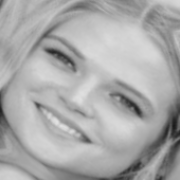

image size : (32, 180, 180, 3)
label size : (32,)


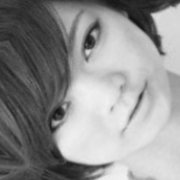

image size : (32, 180, 180, 3)
label size : (32,)


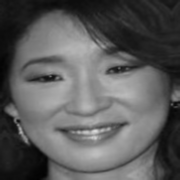

image size : (32, 180, 180, 3)
label size : (32,)


In [ ]:
for im,la in nor_ds.take(3):
    
    cv2_imshow(im[1].numpy().astype('uint8'))
    print('image size :',im.shape)
    print('label size :',la.shape)

In [ ]:






model=tf.keras.Sequential([
pre_proces,
tf.keras.layers.Input(shape=(32,),name='InputLayer'),
tf.keras.layers.Rescaling(1./255),
tf.keras.layers.Conv2D(64,3,activation='relu'),
tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Conv2D(64,3,activation='relu'),
tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Conv2D(64,3,activation='relu'),
tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Conv2D(64,3,activation='relu'),

tf.keras.layers.MaxPooling2D(),

tf.keras.layers.Flatten(),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(128,activation='relu'),
tf.keras.layers.Dropout(0.5),
#tf.keras.layers.Dense(64,activation='relu'),
#tf.keras.layers.Dropout(0.4),
tf.keras.layers.Dense(5,activation='softmax')
])





#model=  model.build(input_shape=(None,180,180,3))

In [ ]:

import joblib
model=tf.keras.models.load_model( '/content/drive/MyDrive/trained_model/project_3_14')

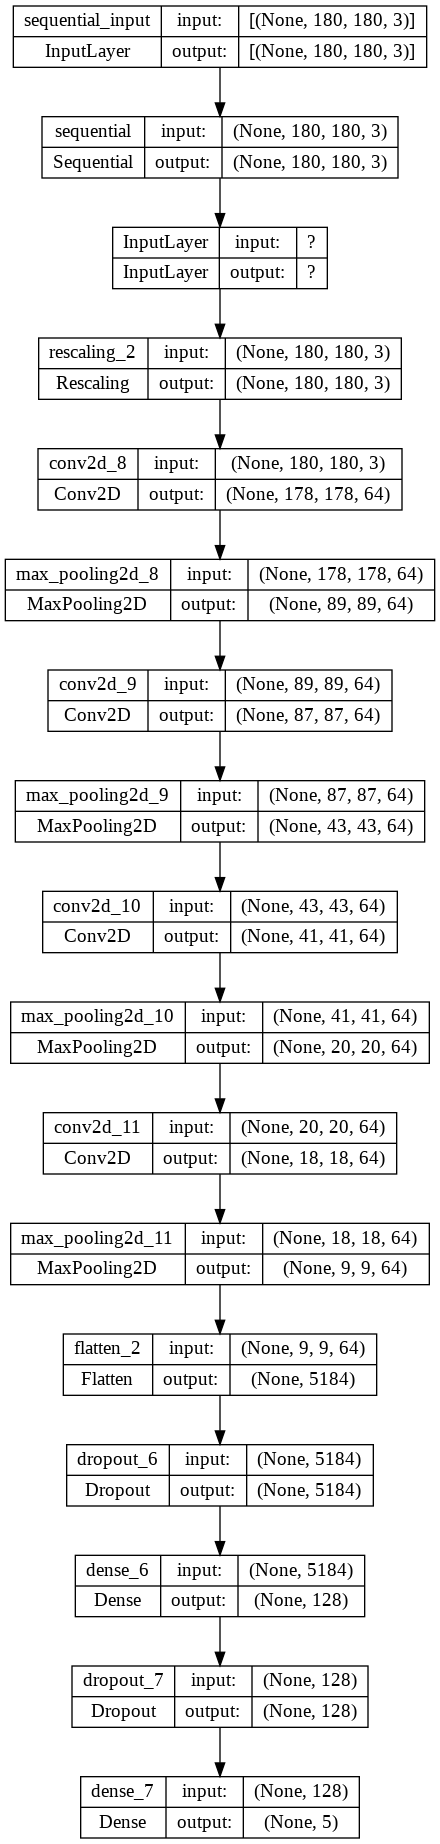

In [ ]:
from keras.utils.vis_utils import plot_model


shape=(32,180,180,3)
model.build(shape)
plot_model(model,to_file='model_plot.png',show_shapes=True)

In [ ]:

optim = tf.keras.optimizers.RMSprop(learning_rate=0.00001)



model.compile(
  optimizer=optim,
  
  #loss='categorical_crossentropy',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],
  
)


#hape=(32,180,180,3)
#model_.build(shape)
#model_.summary()

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1.5])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

Epoch 1/300
124/124 [==============================] - 12s 90ms/step - loss: 0.9188 - accuracy: 0.6542 - val_loss: 0.8876 - val_accuracy: 0.6826
Epoch 2/300
124/124 [==============================] - 11s 89ms/step - loss: 0.8996 - accuracy: 0.6621 - val_loss: 0.9079 - val_accuracy: 0.6648
Epoch 3/300
124/124 [==============================] - 11s 89ms/step - loss: 0.9119 - accuracy: 0.6588 - val_loss: 0.8815 - val_accuracy: 0.6804
Epoch 4/300
124/124 [==============================] - 11s 89ms/step - loss: 0.9255 - accuracy: 0.6585 - val_loss: 0.8733 - val_accuracy: 0.7016
Epoch 5/300
124/124 [==============================] - 11s 89ms/step - loss: 0.9237 - accuracy: 0.6542 - val_loss: 0.9352 - val_accuracy: 0.6592
Epoch 6/300
124/124 [==============================] - 11s 88ms/step - loss: 0.9279 - accuracy: 0.6502 - val_loss: 0.8654 - val_accuracy: 0.6927
Epoch 7/300
124/124 [==============================] - 11s 90ms/step - loss: 0.9085 - accuracy: 0.6558 - val_loss: 0.8959 - val_ac

CPU times: user 1h 10min 4s, sys: 5min 47s, total: 1h 15min 51s
Wall time: 1h 14min 36s


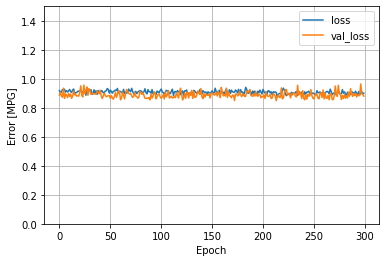

In [ ]:


%%time


history= model.fit(train_ds,validation_data=val_ds,epochs=300)
plot_loss(history)
model.save('/content/drive/MyDrive/trained_model/project_3_16')

In [ ]:
model=joblib.load('/content/face_type_ml_1.pkl')

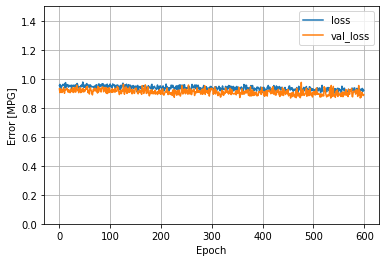

In [ ]:
plot_loss(history)

In [ ]:
model.save('/content/drive/MyDrive/trained_model/project_3_14')

In [ ]:
# Evaluate the restored model
loss, acc =model.evaluate(val_ds, verbose=2)
#print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

#print(model.predict(test_ds))

29/29 - 1s - loss: 0.8896 - accuracy: 0.7004 - 934ms/epoch - 32ms/step


In [ ]:
loss, acc =model.evaluate(nor_ds, verbose=2)
#print

124/124 - 29s - loss: 0.7426 - accuracy: 0.7466 - 29s/epoch - 235ms/step


In [ ]:
labels=val_ds.map(lambda x,y:(y))
predictions=model.predict(val_ds)
tf.math.confusion_matrix(val_ds, predictions,)

29/29 [==============================] - 1s 31ms/step


ValueError: ignored

In [ ]:


import joblib


joblib.dump(model, 'face_type_ml_1.pkl')

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = 340;//video.videoWidth;
      canvas.height =400; //video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
url='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT-priUF0XQJGxOdsWuocLl_l_1w1ybnJyZqQ&usqp=CAU'
from PIL import Image
import requests
from io import BytesIO

response = requests.get(url)
img = Image.open(BytesIO(response.content))

In [ ]:
def face_clean(filename):
    image=cv2.imread(filename,0)
    ret,thresh = cv2.threshold(image,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)#g    
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations = 2)  
    
    dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)

    ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
 
    sure_fg = np.uint8(sure_fg)
    ret,mask = cv2.threshold(sure_fg,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) 
    edges = cv2.Canny(image,100,200) 
    final = cv2.bitwise_and(image,image,mask = edges)

    return final

In [ ]:
def pre_class(pre):
    
    pre_class=['Heart', 'Oblong', 'Oval', 'Round', 'Square']
    max=np.max(pre)
    for i in pre: 
        for m in range(5):

            
            
            if i[m] < max:

                continue

            else:
            
                return print(f'face type :{pre_class[m]}',f'\n prediction score :{max}%')

        
           
#print(pre_class([[0.09639212 0.5206489  0.20879456 0.0360038  0.13816057]]))

def face_clean(filename):
    frame=cv2.imread(filename)  
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # define range of blue color in HSV
    lower_blue = np.array([125,15,105])
    upper_blue = np.array([250,200,200])
    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    res = cv2.bitwise_and(frame,frame, mask= mask)
    return res

In [ ]:


#img=os.path.join('/storage/emulated/0/DCIM/Camera/IMG_20221012_143034.jpg')
#img=np.array(img)

imga='/content/Screenshot_2022-10-14-17-50-41-591-edit_com.whatsapp.jpg'
img=cv2.imread(imga)

#cv2_imshow(img)
img.resize([1,180,180,3])
img=np.uint8(img)

pre=model.predict(img)
pre_class(pre)

In [ ]:
img=cv2.imread(imga)
cv2_imshow(img)

In [ ]:


def img_counter(filename):
    image=cv2.imread(filename)
    gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(gray_image,127,255,0) #calculate the contours from binary image
    im,contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    with_contours = cv2.drawContours(image,contours,-1,(0,255,0),3)
    cv2_imshow(with_contours)

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  frame=cv2.imread(filename)
  #frame=face_clean(filename)
  print(frame.shape)
  frame.resize([1,180,180,3])
  #frame=pre_proces(frame)
  print(frame.shape)
 # canny= cv2.Canny(frame,100,200)
  img=np.uint8(frame)
  pre=model.predict(img)  
  pre_class(pre) 
  #print(pre)
   #,train_ds.class_names)



  
  #res=face_clean(filename)
 
  #img_counter(filename)
  
  
  res=cv2.imread(filename)
  cv2.resize(res,[180,180])
 # canny= cv2.Canny(res,100,200)
  cv2_imshow(res)
 # plt.imshow(res)
  # Show the image which was just taken.  
  #display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

In [ ]:
train_ds.class_names